# Transient Courswe IHE 2024, Feb 19 in class

The idea is to get going with Python (notebooks) for exploring and documenting your work, and perhaps for some inspiration.

    Theo Olsthoorn
    Delft, 2024-02-19, 18:00h


# Some high-school stuff to get the idea

A thrid degree polynomium from high school would be something like this:

$$ y = a x^3 -b x^ 2 + c x + d $$

And on the same high school we learned how to take the derivative $\frac{dy}{dx} = 3 a x^2 - 2 b x + c$ and the second derivative, which is $\frac{d^2y}{dx^2} = 6 a x - 2b $.Now, with python availabe it is easy to bring such mathematics to live.

But first we have to import `numpy` to work with arrays and `matplotlib.pyplot` to plot the results.

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc, exp1 as Wt, k0 as K0
from itertools import cycle

Next, choose some values for the coefficients and generate an array of x values to cover the zone of interest.

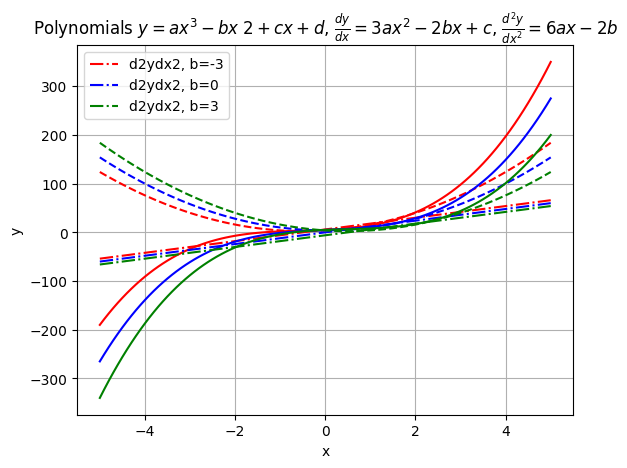

In [53]:
a, bees, c, d = 2,[-3, 0, 3], 4, 5
x = np.linspace(-5, 5, 101)

plt.title(r"Polynomials $ y = a x^3 -b x^ 2 + c x + d$, " + 
          r"$\frac{dy}{dx} = 3 a x^2 - 2 b x + c$, " +
          r"$\frac{d^2y}{dx^2} = 6 a x - 2b$")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

clrs = cycle('rbgkm')
for b in bees:
    clr = next(clrs)
    y = a * x ** 3 - b * x ** 2 + c * x + d
    dydx = 3 * a * x ** 2 - 2 * b * x + c
    d2ydx2 = 6 * a * x - 2 * b
    plt.plot(x, y,      color=clr, ls='-',  label='__y___, b={}'.format(b))
    plt.plot(x, dydx,   color=clr, ls='--', label='_dydx_, b={}'.format(b))
    plt.plot(x, d2ydx2, color=clr, ls='-.', label='d2ydx2, b={}'.format(b))

plt.legend()
plt.show()

# Another example, drainage of grw. basin with half-time

We have the partial differential equation for transient flow and head $\phi$ in a confined aquifer with uniform transsivity $kD$ and storagen coefficient $S$:

$$
kD \frac{\partial^2 \phi}{\partial x^2} = S \frac{\partial \phi}{\partial t}
$$

The transient drainage from a basin of width $b$ then is given by

$$
s(x,t) = A \frac{4}{\pi} \sum_{j=1}^{\infty} 
\left\{
\frac{(-1)^{j-1}}{2j - 1} \cos \left[(2j -1)\left(\frac{\pi}{2}\right)\frac{x}{b}\right]
\exp \left[ -(2j - 1)^2 \left( \frac{\pi}{2}\right)^2 \frac{t}{T}\right]
\right\}
$$

in which
$$ T = \frac{b^2 S}{kD} $$
can be seen as the characteristic drainage time for this basin.

The half time $\Delta t$ of the drainage, valid after about $0.25 T$ was derived in class
$$ \Delta t = \frac{4}{\pi^2}\ln 2 \approx 0.28 T$$

We can now implement this formula and snow the working of the half time.



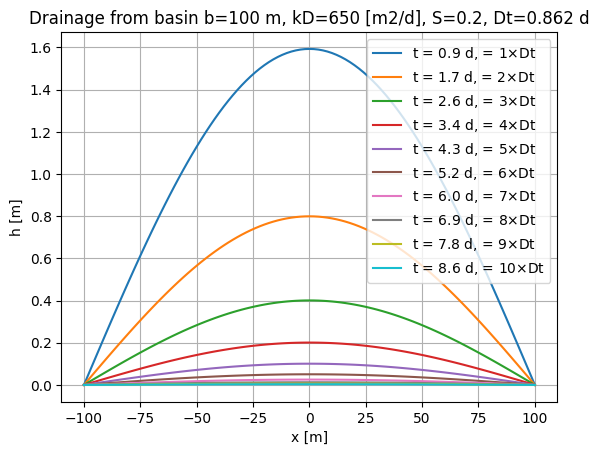

In [63]:
x = np.linspace(-b, b, 101)
s = np.zeros_like(x)
kD = 650
S = 0.2
b = 100

T = b ** 2 * S / kD
Dt = 0.28 * T

plt.title("Drainage from basin b={:.3g} m, kD={:.3g} [m2/d], S={:.3g}, Dt={:.3g} d".format(b, kD, S, Dt))
plt.xlabel("x [m]")
plt.ylabel("h [m]")
plt.grid()

for t in np.arange(Dt, 11 * Dt, Dt):
    s = np.zeros_like(x)
    for j in range(1, 25):
        tjm1 = 2 * j - 1
        s += ((-1) ** (j-1) / tjm1 * np.cos(tjm1 * np.pi / 2 * x / b) *
                np.exp(- (tjm1 ** 2) * (np.pi / 2) ** 2 * t / T))
    s *= A * 4  / np.pi
    plt.plot(x, s, label=r't = {:.1f} d, = {:.0f}$\times$Dt'.format(t, t / Dt))

plt.legend()
plt.show()

You see how nicely the head elevation is halved after each half time $Dt$.

# Now see the $\mbox{erfc}$ at work to compute the head change after a sudden change at $x=0$

The solution is

$$ s(x, t) = A \, \mbox{erfc}(u), \,\,\,\,u=\sqrt{\frac{x^2 S}{4 kD t}} $$

But first the function $\mbox{erfc(u)}$ itself, as a function of $u$, i.e. proportional to $x$ and as a function of $1/u$, which is proportional to $\sqrt{t}$.

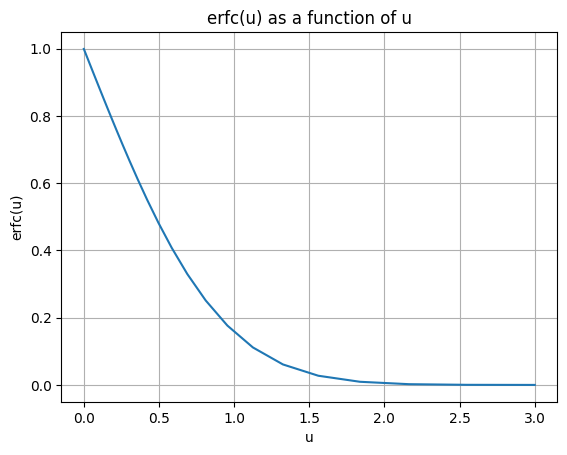

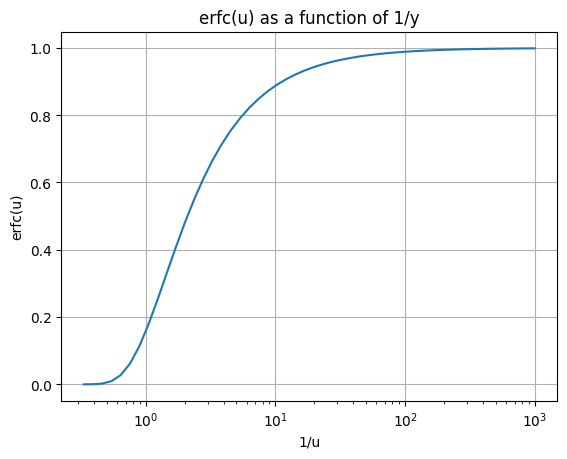

In [72]:
u = np.logspace(-3, np.log10(3))
plt.title("erfc(u) as a function of u") 
plt.xlabel("u")
plt.ylabel("erfc(u)")
plt.grid()
plt.xscale('linear')
plt.plot(u, erfc(u))
plt.show()

plt.title("erfc(u) as a function of 1/y")
plt.xlabel("1/u")
plt.ylabel("erfc(u)")
plt.grid()
plt.xscale('log')
plt.plot(1/u, erfc(u))
plt.show()

## Now use the erfc fucnction for some real cases

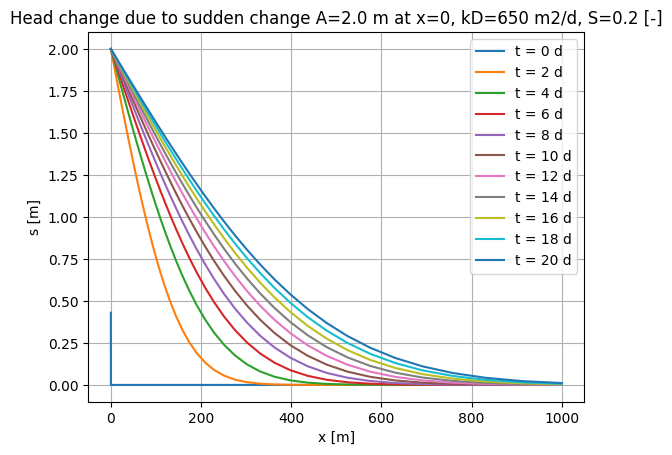

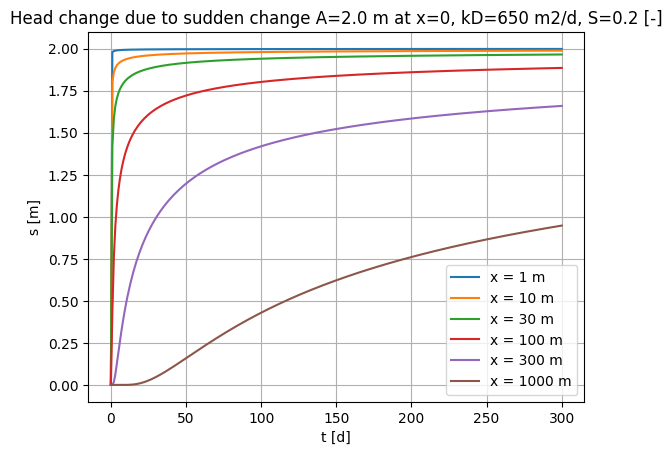

In [78]:
x = np.logspace(-1, 3, 101)
kD = 650 # m2/d
S = 0.2 # [-]
A = 2.0 # [m]

plt.title("Head change due to sudden change A={:.1f} m at x=0, kD={:.0f} m2/d, S={} [-]".format(A, kD, S))
plt.xlabel('x [m]')
plt.ylabel('s [m]')
plt.grid()

times = np.linspace(0, 20, 11)
times[0] = 1e-6 # prevent division by zero
for t in times:
    u = np.sqrt(x ** 2 * S / (4 * kD * t))
    s = A * erfc(u)
    plt.plot(x, s, label='t = {:.0f} d'.format(t))
plt.legend()
plt.show()

plt.title("Head change due to sudden change A={:.1f} m at x=0, kD={:.0f} m2/d, S={} [-]".format(A, kD, S))
plt.xlabel('t [d]')
plt.ylabel('s [m]')
plt.grid()

distances = [1, 10, 30, 100, 300, 1000]
times = np.linspace(0, 300, 301)
times[0] = 1e-6 # prevent division by zero
for x in distances:
    u = np.sqrt(x ** 2 * S / (4 * kD * times))
    s = A * erfc(u)
    plt.plot(times, s, label='x = {:.0f} m'.format(x))
plt.legend()
plt.show()
                

# Steady state drawdown due to a well in semi confined aquifer

This uses the bessel function $K_0$, which we imported from `sicpy.special`

$$ s = \frac{Q}{2 \pi kD}  K_0\left( \frac{r}{\lambda} \right),\,\,\,\,\lambda=\sqrt{kD c}$$

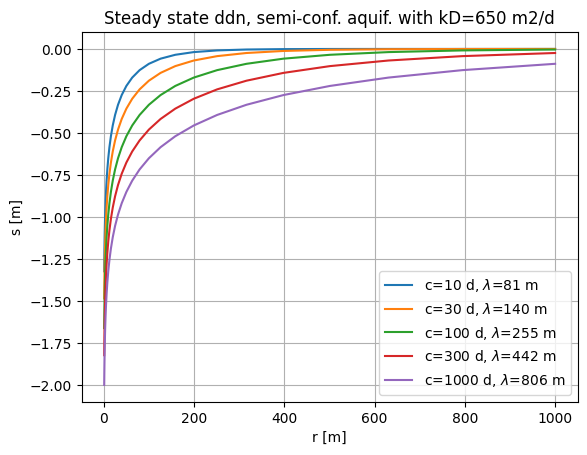

In [87]:
Q, kD, cees, S = 1200, 650, [10, 30, 100, 300, 1000], 0.001
r = np.logspace(0, 3, 31)
plt.title("Steady state ddn, semi-conf. aquif. with kD={:.0f} m2/d".format(
    kD))
plt.xlabel('r [m]')
plt.ylabel('s [m]')
plt.grid()

for c in cees:
    L = np.sqrt(kD * c)
    s = -Q / (2 * np.pi * kD) * K0(r / L)
    plt.plot(r, s, label=r"c={:.4g} d, $\lambda$={:.0f} m".format(c, L))
plt.legend()

# Finally,  transient flow to a well according to Theis (1935)

$$s(r, t) = \frac{Q}{4 \pi kD} Wt(u),\,\,\,\,u=\frac{r^2 S}{4 kD t}$$

Notice that $Wt$ is the same as function $exp1$. We imported from `scipy.special` as

`from sscipy.special import exp1 as Wt`

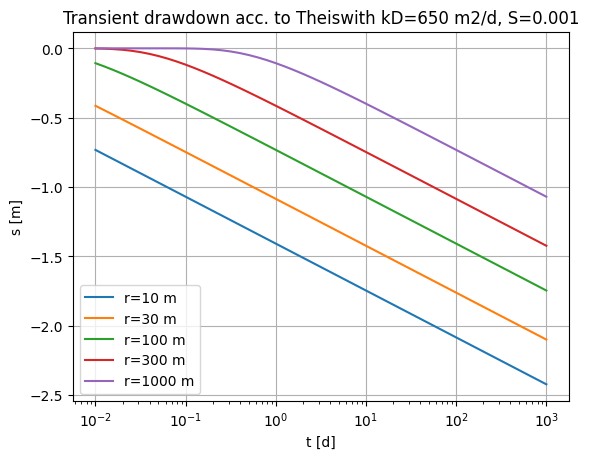

In [91]:
Q, kD, S = 1200, 650, 0.001
r = np.logspace(0, 3, 31)
plt.title("Transient drawdown acc. to Theiswith kD={:.0f} m2/d, S={:.3g}".format(kD, S))
plt.xlabel('t [d]')
plt.ylabel('s [m]')
plt.xscale('log')
plt.grid()

times = np.logspace(-2, 3, 51)
for r in [10, 30, 100, 300, 1000]:
    u = r ** 2 * S / (4 * kD * times)
    s = -Q / (4 * np.pi * kD) * Wt(u)
    plt.plot(times, s, label=r"r={:.4g} m".format(r))
plt.legend()

# Theis + simpllified

$$ s = \frac{Q}{4 \pi kD} W_t(u) $$

Simplified

$$ s \approx \frac{Q}{4 \pi kD} \ln \left(\frac{2.25 kD t}{r^2 s} \right) $$

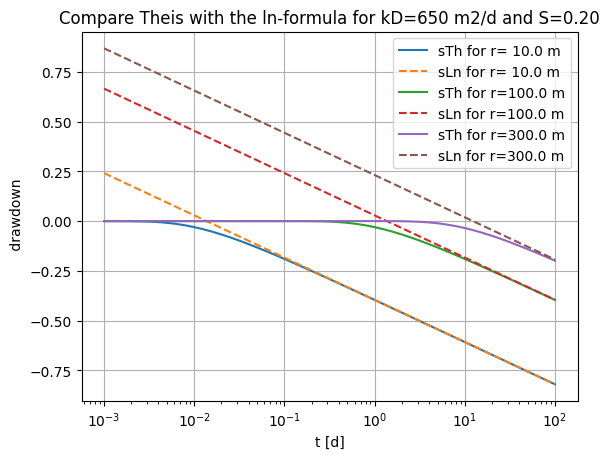

In [120]:
kD = 650 # m2/d
S = 0.2
rs = [10, 100, 300]
Q = 753 # m3/d
t = np.logspace(-3, 2, 51)

plt.title('Compare Theis with the ln-formula for kD={:.0f} m2/d and S={:.2f}'.format(kD, S))
plt.xlabel('t [d]')
plt.ylabel(' drawdown')
plt.grid(True)
plt.xscale('log')

for r in rs:
    u = r ** 2 *  S / (4 * kD * t)

    sTh = -Q / (4 * np.pi * kD) * Wt( u )
    sLn = -Q / (4 * np.pi * kD) * np.log((2.25 * kD * t) / (r ** 2 * S))
    plt.plot(t, sTh, label='sTh for r={:5.1f} m'.format(r))
    plt.plot(t, sLn, '--', label='sLn for r={:5.1f} m'.format(r))

plt.legend()
                                      

# Theis type curve

That is the curve of Wt versus 1/u on double log scales.

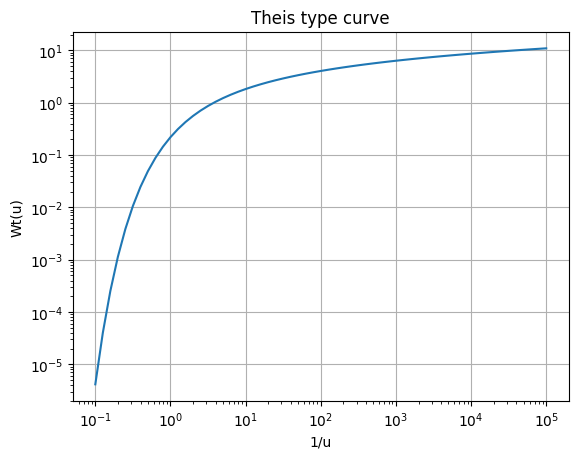

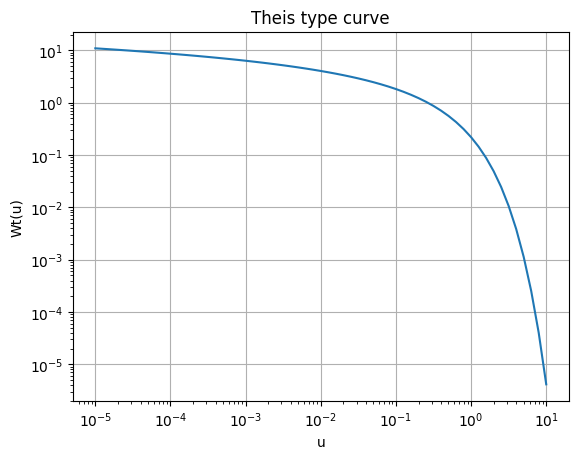

In [127]:
u = np.logspace(-5, 1, 61)

plt.title("Theis type curve")
plt.xlabel("1/u")
plt.ylabel("Wt(u)")
plt.grid(True)
plt.xscale('log')
plt.yscale('log')

plt.plot(1/u, Wt(u))

plt.show()

plt.title("Theis type curve")
plt.xlabel("u")
plt.ylabel("Wt(u)")
plt.grid(True)
plt.xscale('log')
plt.yscale('log')

plt.plot(u, Wt(u))

plt.show()

# Where are my files?

1. You can search you computer.
1. You can Google "where does Jupyter store my files when I use Anaconda?"
1. You can Google "How do I launch Jupyter right in the directory of my choice"
1. How do I find out in what directory I work in Jupyter?

In [131]:
# You can run a command outside the notebook by using the command preceded by an exclamation point.
!pwd

/Users/Theo/Entiteiten/IHE/IHE2023-2024/Assignment


If you need to run commands on your computer, first launch the `console app` and in that you can run commands
like the `pwd` (print working directory) or `dir` or `cd` or whatever. Often internet sites tell you how to install things or so using commands. You can also navigate to different drives and directories (folders) in this concole app using the command `cd`, meaning `change directory`.

One thing with Jupyter is worth knowing. Which is, that the directory that you launch Jupyter in will be the top of the directory structure that Jupyter can see. Meaning you can't see the directories above, only those below.